Gráfico salvo em: rmse_comparison.png


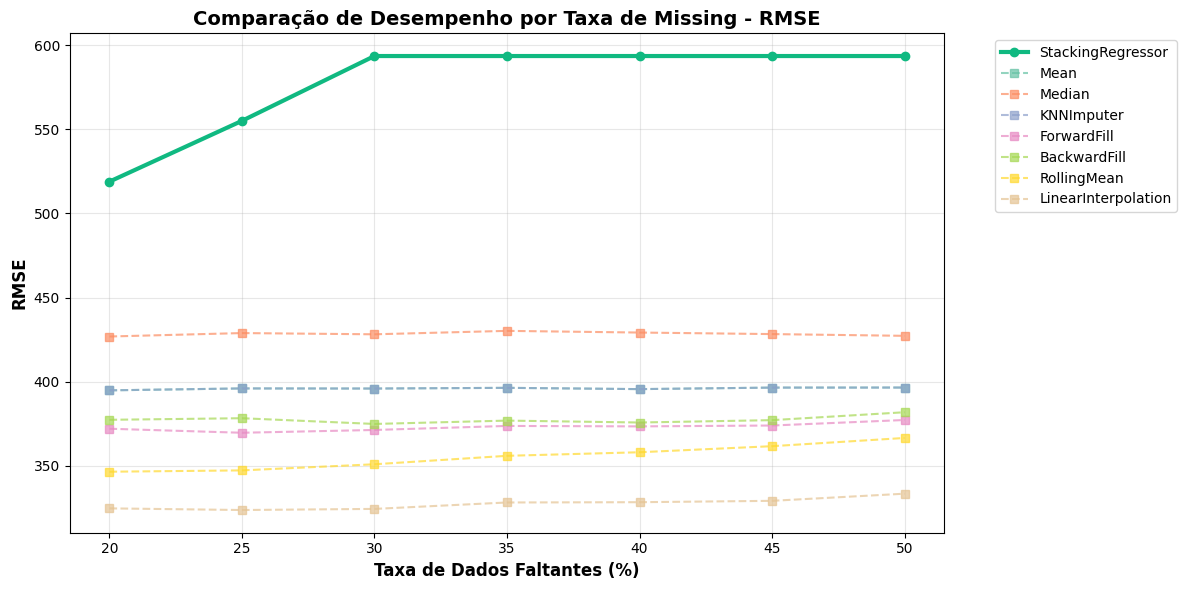

                Método     Média     Desvio       Mínimo        Máximo  \
0    StackingRegressor -4.482867  22.621927  -288.205500  9.727000e-01   
1                 Mean -0.098617   0.987834   -23.419815 -2.655205e-10   
2               Median -0.102835   0.192257    -4.883035 -8.540758e-09   
3           KNNImputer -0.098617   0.987834   -23.419815 -2.655205e-10   
4          ForwardFill -1.257887   7.367715  -244.203083  8.388363e-01   
5         BackwardFill -2.842234  40.067636 -1250.620082  8.495368e-01   
6          RollingMean -0.948042   6.176079  -185.679245  8.438679e-01   
7  LinearInterpolation -0.916789  10.460841  -324.272235  8.705254e-01   

    Mediana  
0  0.622700  
1 -0.003724  
2 -0.048440  
3 -0.003724  
4 -0.404384  
5 -0.442761  
6 -0.332388  
7 -0.166833  
              Baseline  Melhoria (%)
0                 Mean     14.347481
1               Median     19.907463
2           KNNImputer     14.347481
3          ForwardFill     15.018765
4         BackwardFill

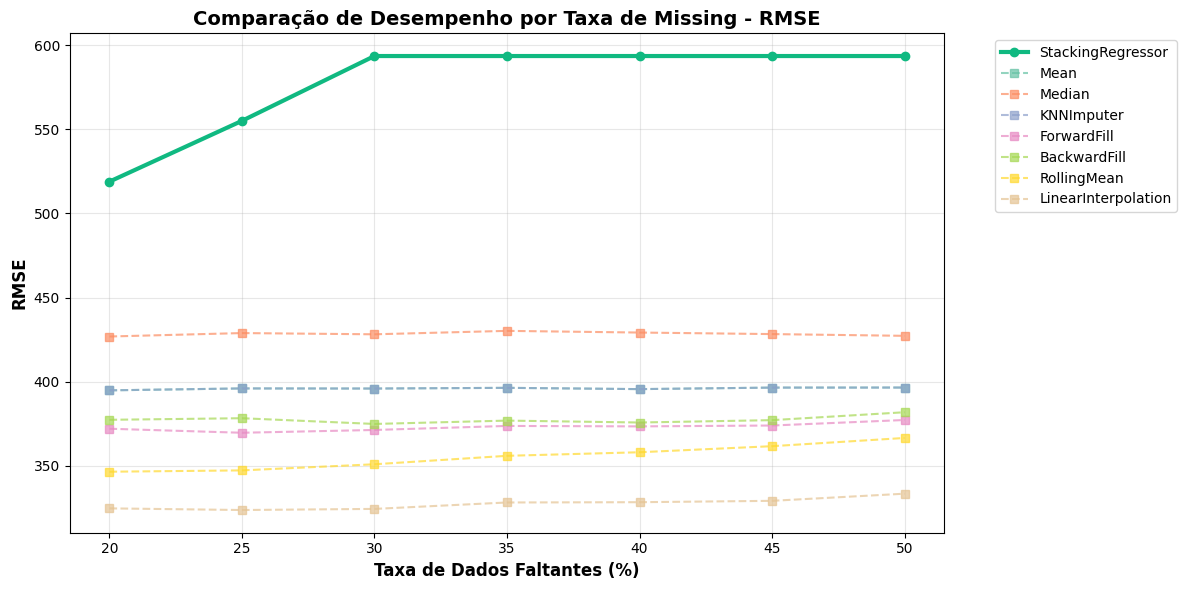

Gráfico salvo em: resultados_artigo/rmse_bar_comparison.png


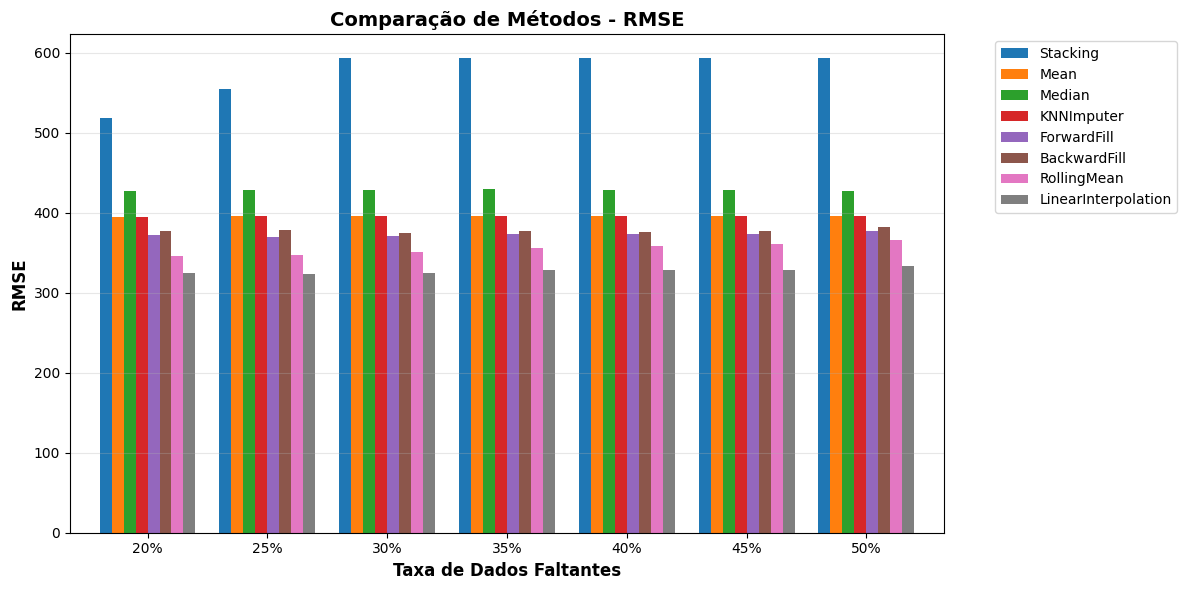

C:\Users\LARCES_MALU\AppData\Local\Temp\ipykernel_92768\112069089.py:321: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Método', y='Valor', palette='Set2')


Boxplot salvo em: resultados_artigo/rmse_boxplot.png


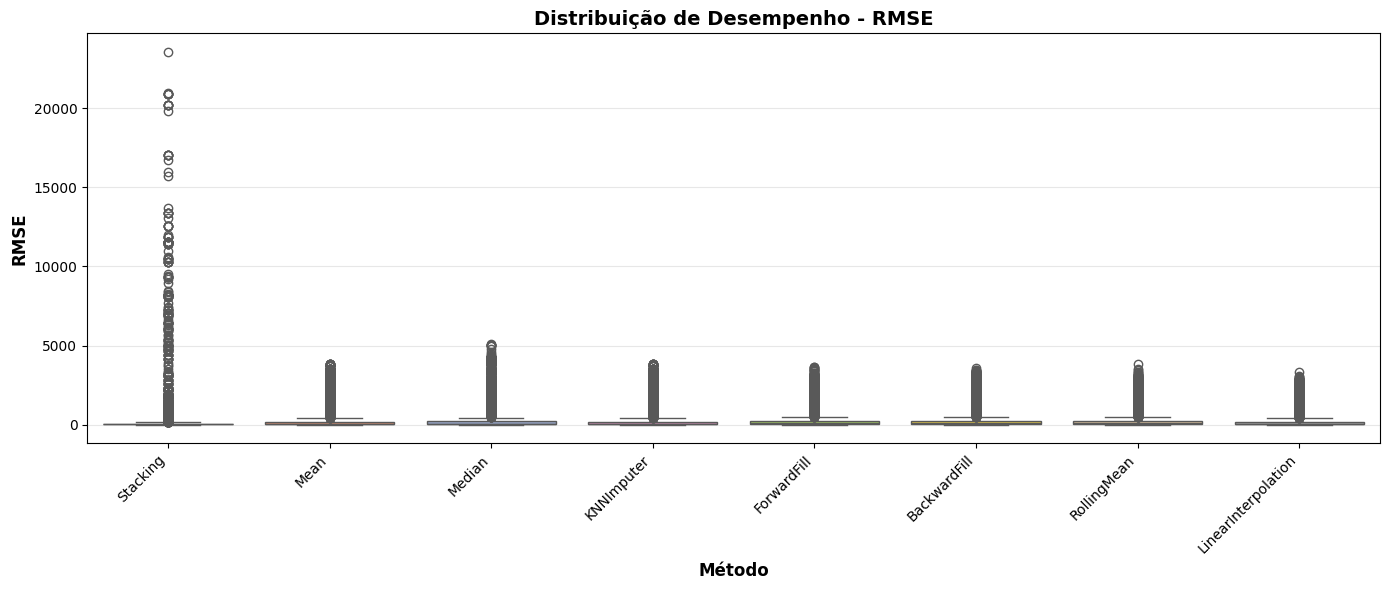

  ✓ Arquivos salvos para rmse

📊 Processando métrica: NRMSE (%)
Gráfico salvo em: resultados_artigo/nrmse_line_comparison.png


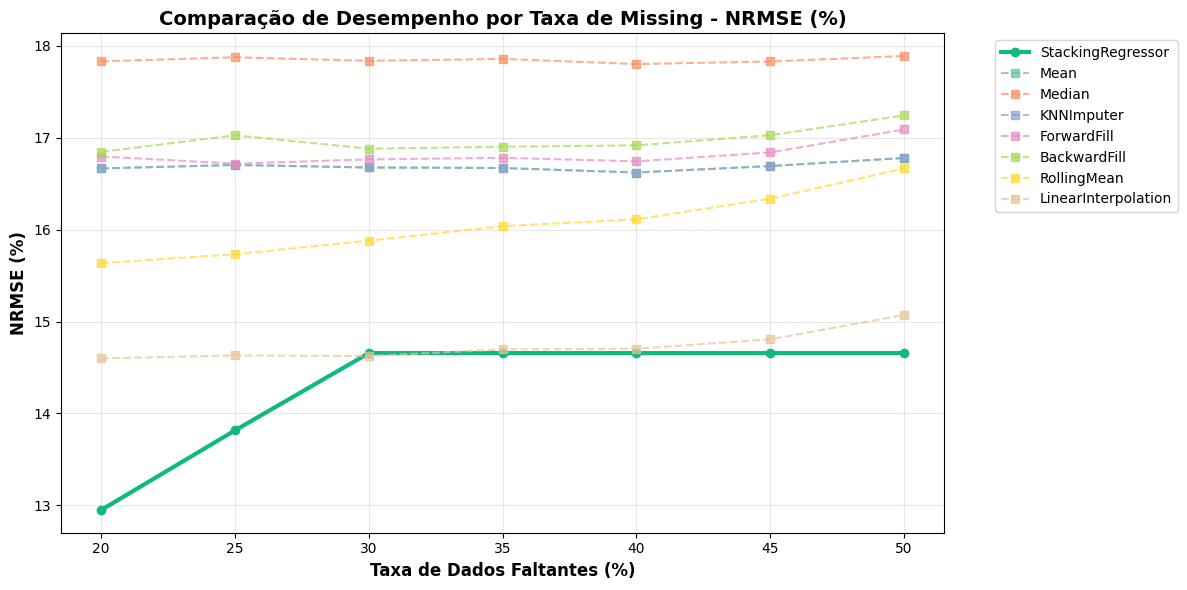

Gráfico salvo em: resultados_artigo/nrmse_bar_comparison.png


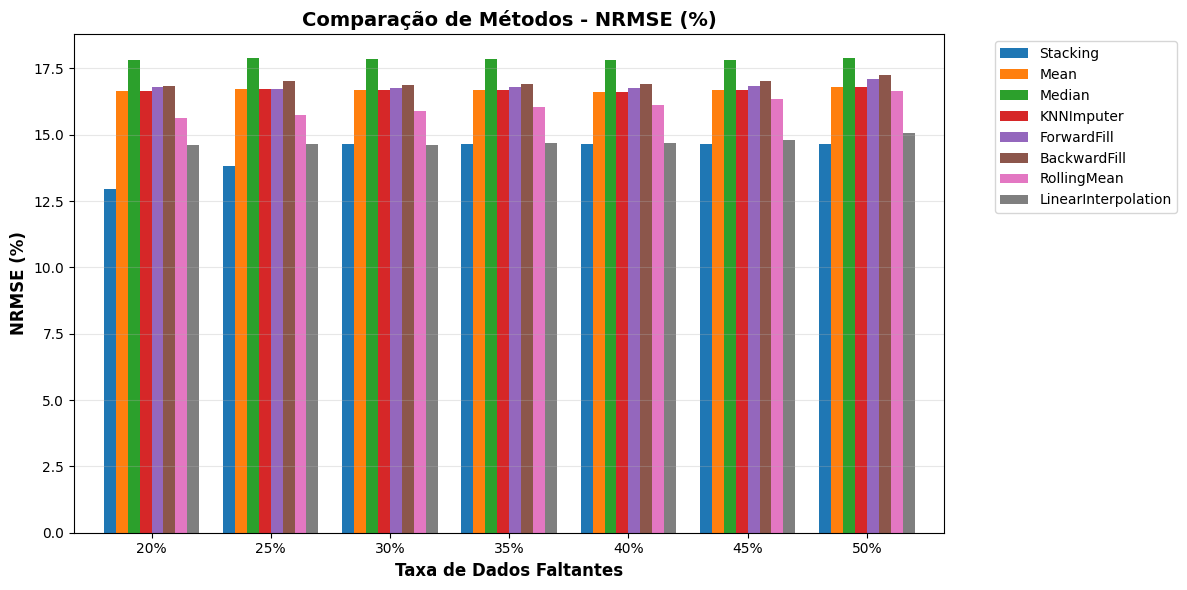

C:\Users\LARCES_MALU\AppData\Local\Temp\ipykernel_92768\112069089.py:321: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Método', y='Valor', palette='Set2')


Boxplot salvo em: resultados_artigo/nrmse_boxplot.png


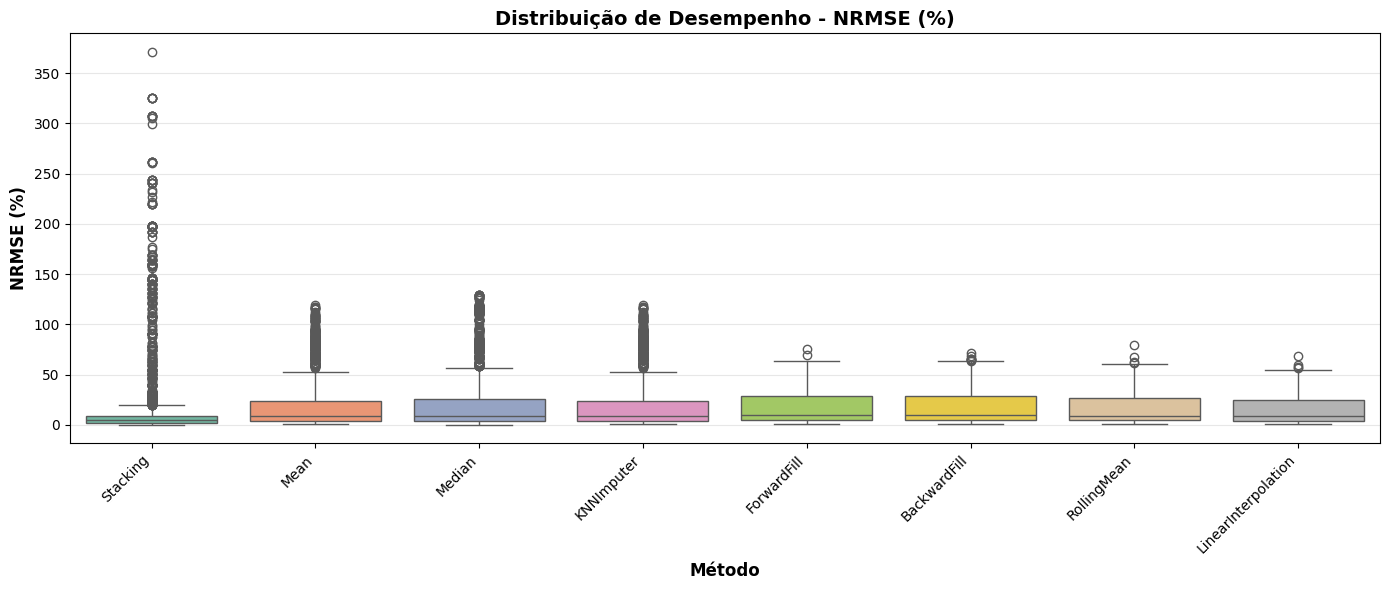

  ✓ Arquivos salvos para nrmse

📊 Processando métrica: R² Score
Gráfico salvo em: resultados_artigo/r2_line_comparison.png


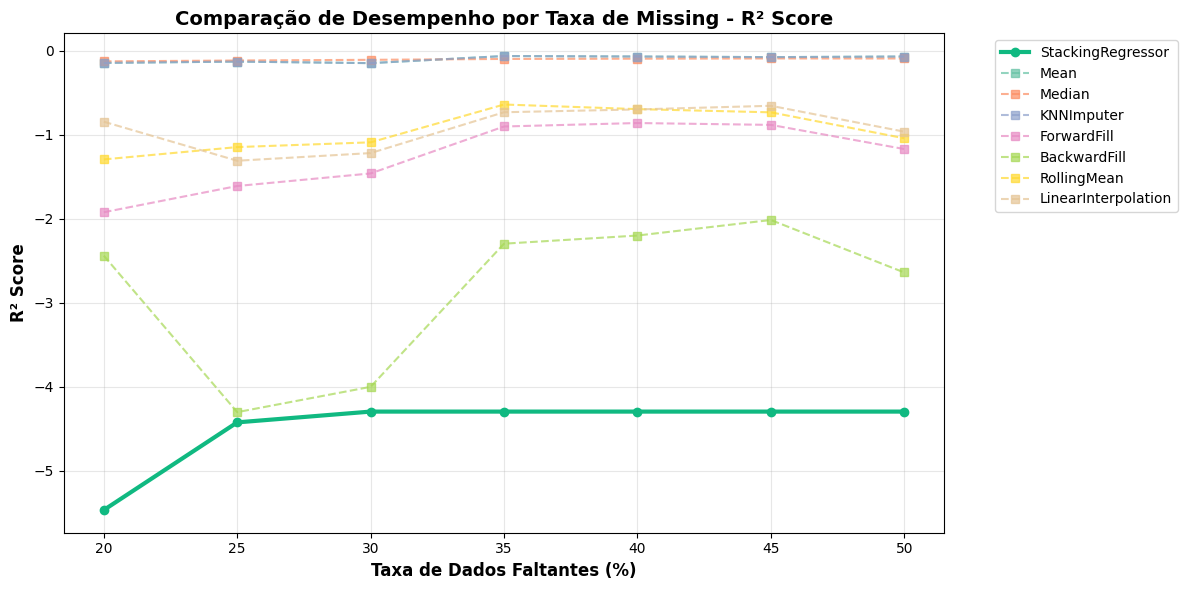

Gráfico salvo em: resultados_artigo/r2_bar_comparison.png


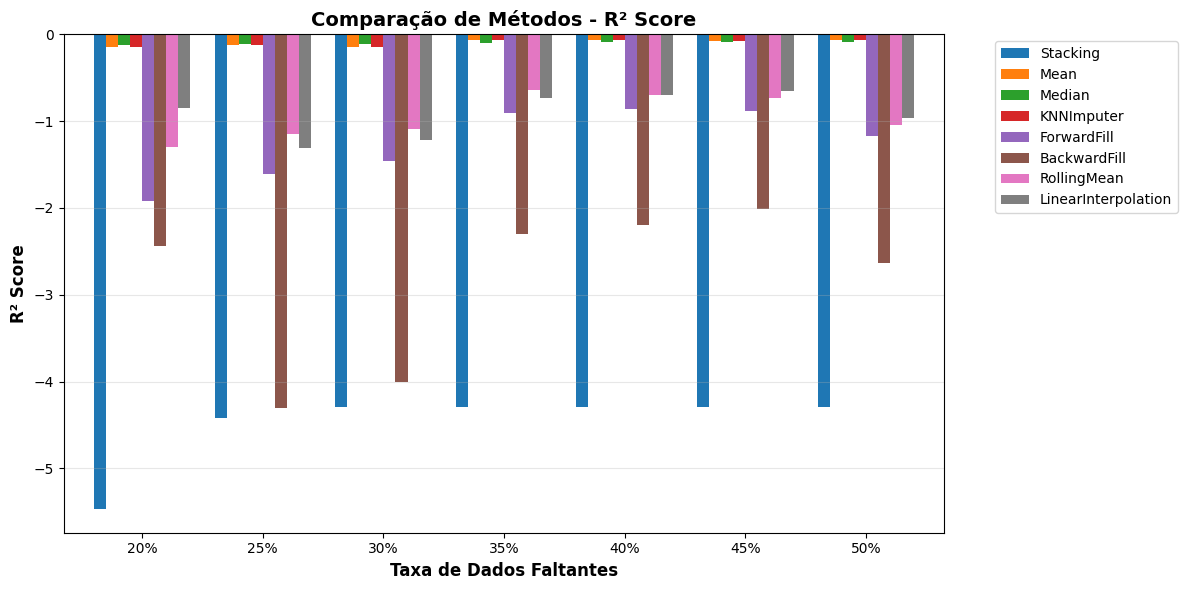

C:\Users\LARCES_MALU\AppData\Local\Temp\ipykernel_92768\112069089.py:321: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Método', y='Valor', palette='Set2')


Boxplot salvo em: resultados_artigo/r2_boxplot.png


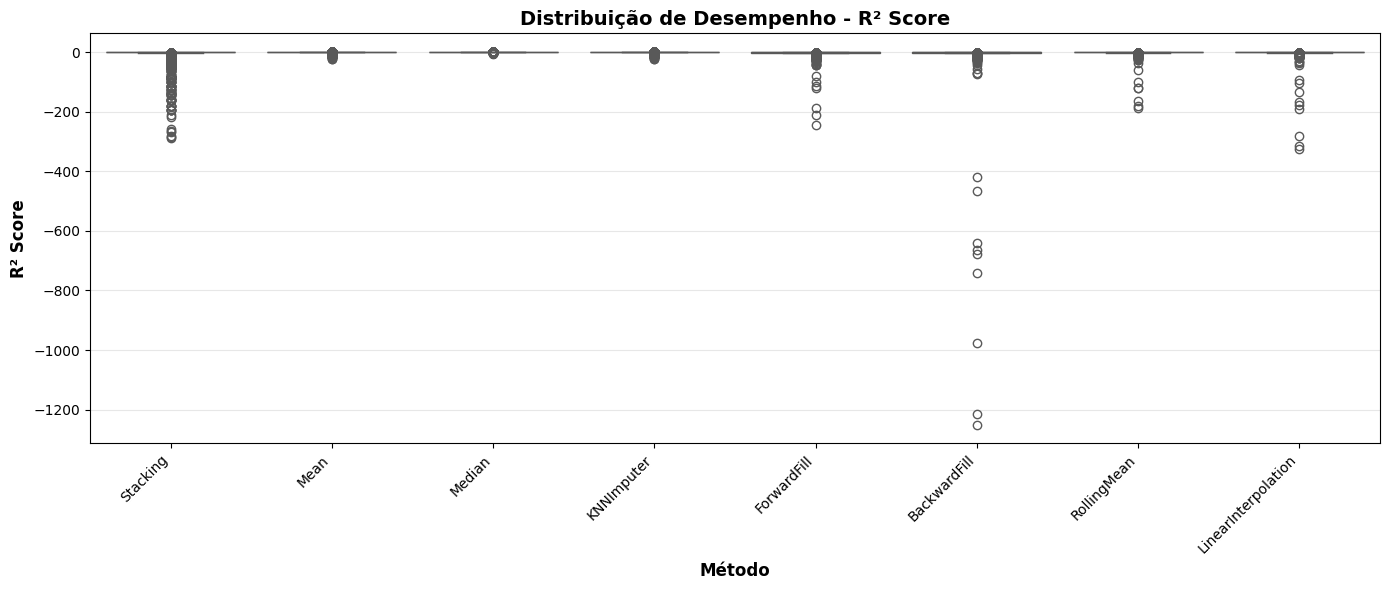

  ✓ Arquivos salvos para r2

📊 Processando métrica: MAPE (%)
Gráfico salvo em: resultados_artigo/mape_line_comparison.png


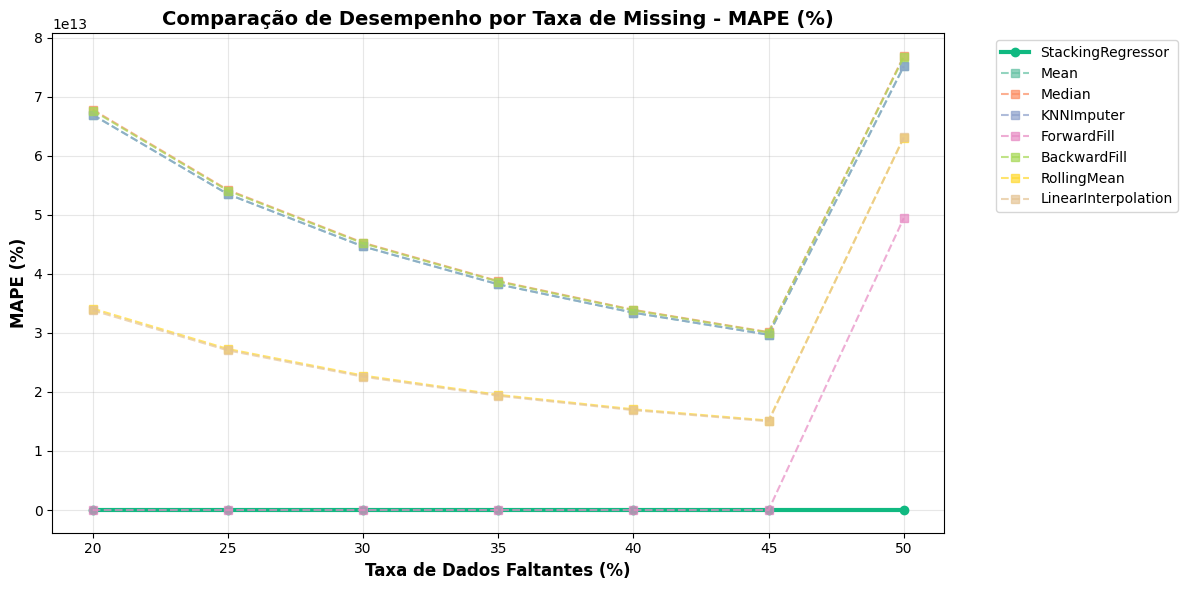

Gráfico salvo em: resultados_artigo/mape_bar_comparison.png


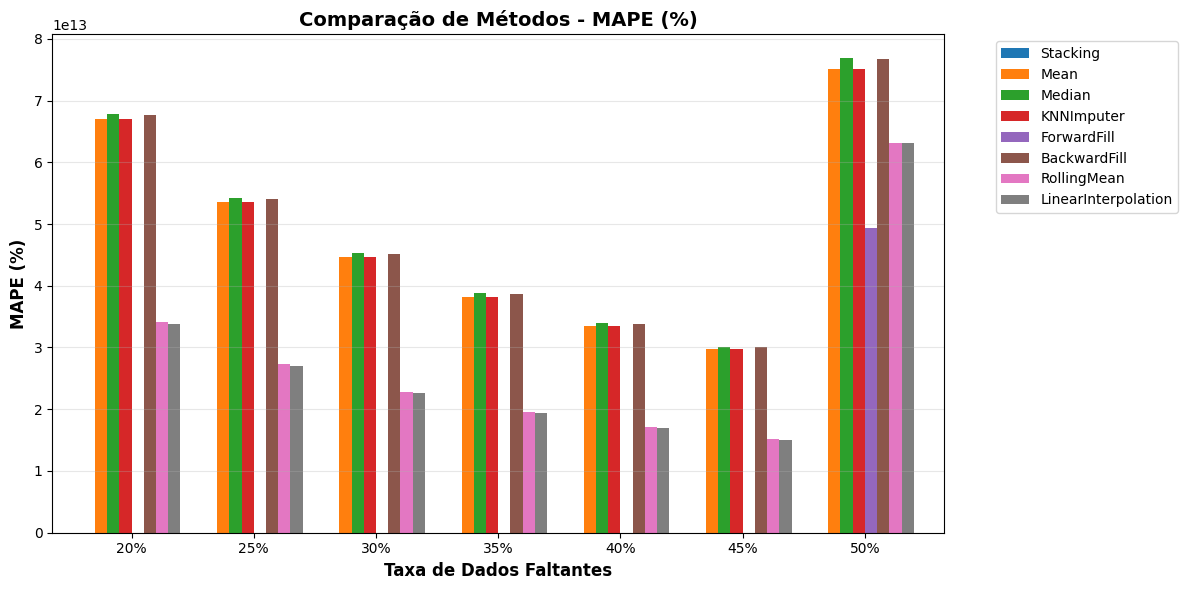

C:\Users\LARCES_MALU\AppData\Local\Temp\ipykernel_92768\112069089.py:321: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Método', y='Valor', palette='Set2')


Boxplot salvo em: resultados_artigo/mape_boxplot.png


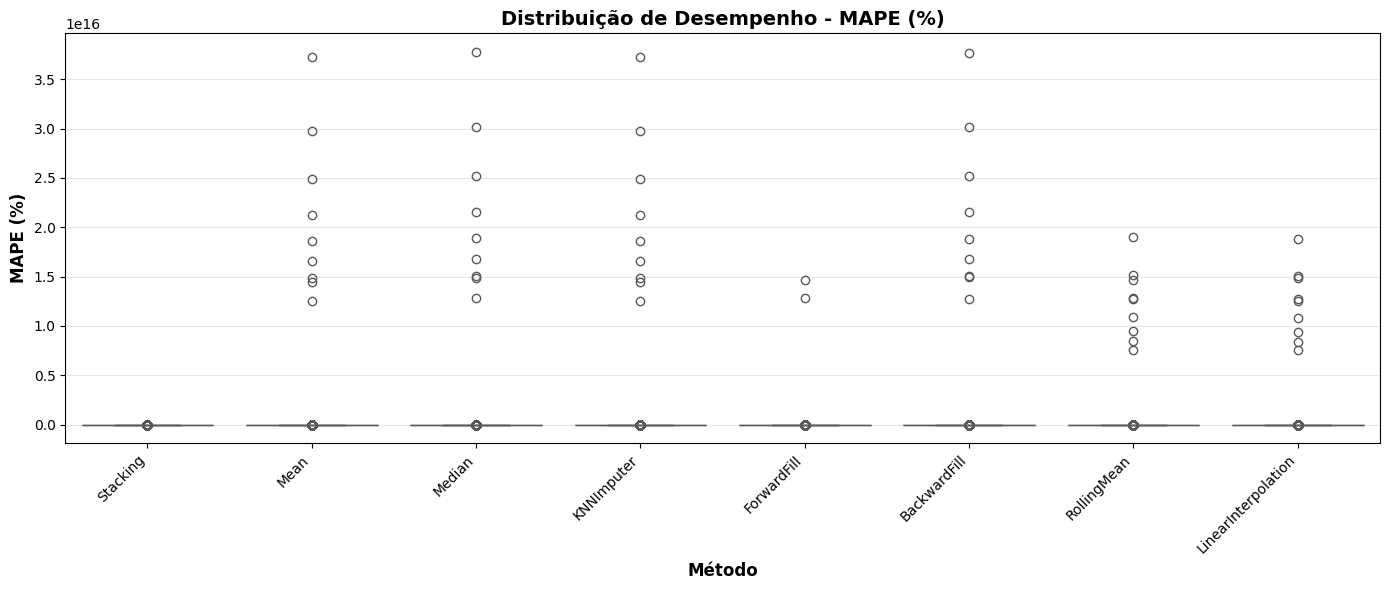

  ✓ Arquivos salvos para mape

🔥 Gerando heatmap de melhorias...
Heatmap salvo em: resultados_artigo/improvements_heatmap.png


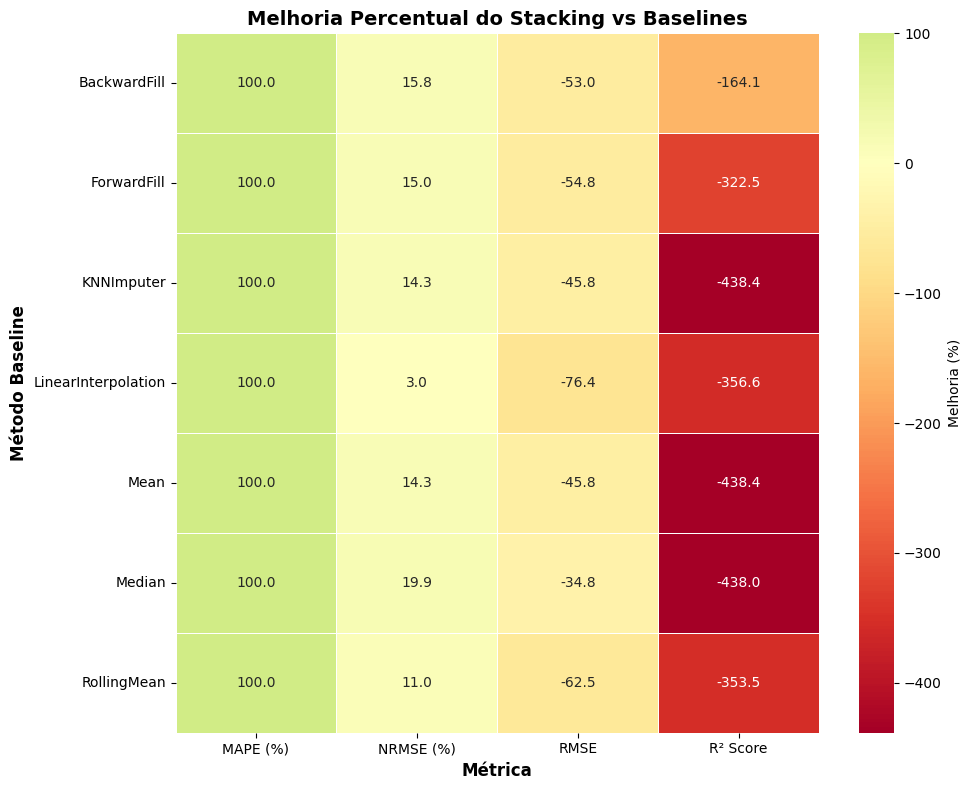


✅ RELATÓRIO COMPLETO GERADO EM: resultados_artigo/


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

class MissingDataAnalyzer:
    """
    Classe para análise e visualização de resultados de imputação de dados faltantes.
    """
    
    def __init__(self, json_path):
        """
        Inicializa o analisador com os dados do JSON.
        
        Args:
            json_path (str): Caminho para o arquivo JSON com os resultados
        """
        with open(json_path, 'r') as f:
            self.data = json.load(f)
        
        self.links = list(self.data.keys())
        self.missing_rates = None
        self.baseline_methods = None
        self._extract_metadata()
        
    def _extract_metadata(self):
        """Extrai metadados dos dados carregados."""
        first_link = self.links[0]
        self.missing_rates = sorted([float(k) for k in self.data[first_link].keys()])
        
        first_rate = str(self.missing_rates[0])
        if 'baseline' in self.data[first_link][first_rate]:
            self.baseline_methods = list(self.data[first_link][first_rate]['baseline'].keys())
    
    def extract_metric_data(self, metric='rmse'):
        """
        Extrai dados de uma métrica específica para todos os métodos e taxas de missing.
        
        Args:
            metric (str): Métrica a ser extraída ('rmse', 'nrmse', 'r2', 'mape')
            
        Returns:
            dict: Dicionário com dados do stacking e baselines
        """
        results = {
            'missing_rates': self.missing_rates,
            'stacking': {link: [] for link in self.links},
            'baselines': {method: {link: [] for link in self.links} for method in self.baseline_methods}
        }
        
        for link in self.links:
            for rate in self.missing_rates:
                rate_key = str(rate)
                
                # Extrai dados do Stacking
                if 'stacking' in self.data[link][rate_key]:
                    stack_value = self.data[link][rate_key]['stacking']['mean']['StackingRegressor'][metric]
                    # Converte None para np.nan
                    results['stacking'][link].append(stack_value if stack_value is not None else np.nan)
                else:
                    results['stacking'][link].append(np.nan)
                
                # Extrai dados das Baselines
                if 'baseline' in self.data[link][rate_key]:
                    for method in self.baseline_methods:
                        value = self.data[link][rate_key]['baseline'][method][metric]
                        # Converte None para np.nan
                        results['baselines'][method][link].append(value if value is not None else np.nan)
        
        return results
    
    def compute_statistics(self, metric='rmse'):
        """
        Calcula estatísticas agregadas para uma métrica.
        
        Args:
            metric (str): Métrica para calcular estatísticas
            
        Returns:
            pd.DataFrame: DataFrame com estatísticas por método
        """
        data = self.extract_metric_data(metric)
        
        stats_list = []
        
        # Estatísticas do Stacking
        stack_values = np.concatenate([data['stacking'][link] for link in self.links])
        stack_values = np.array([v for v in stack_values if v is not None and not np.isnan(v) and np.isfinite(v)])
        
        if len(stack_values) > 0:
            stats_list.append({
                'Método': 'StackingRegressor',
                'Média': np.mean(stack_values),
                'Desvio': np.std(stack_values),
                'Mínimo': np.min(stack_values),
                'Máximo': np.max(stack_values),
                'Mediana': np.median(stack_values)
            })
        
        # Estatísticas das Baselines
        for method in self.baseline_methods:
            method_values = np.concatenate([data['baselines'][method][link] for link in self.links])
            method_values = np.array([v for v in method_values if v is not None and not np.isnan(v) and np.isfinite(v)])
            
            if len(method_values) > 0:
                stats_list.append({
                    'Método': method,
                    'Média': np.mean(method_values),
                    'Desvio': np.std(method_values),
                    'Mínimo': np.min(method_values),
                    'Máximo': np.max(method_values),
                    'Mediana': np.median(method_values)
                })
        
        return pd.DataFrame(stats_list)
    
    def compute_improvements(self, metric='rmse'):
        """
        Calcula a melhoria percentual do Stacking em relação às baselines.
        
        Args:
            metric (str): Métrica para calcular melhorias
            
        Returns:
            pd.DataFrame: DataFrame com melhorias percentuais
        """
        stats = self.compute_statistics(metric)
        stack_mean = stats[stats['Método'] == 'StackingRegressor']['Média'].values[0]
        
        improvements = []
        for _, row in stats.iterrows():
            if row['Método'] != 'StackingRegressor':
                if metric == 'r2':
                    # Para R², quanto maior melhor
                    improvement = ((stack_mean - row['Média']) * 100)
                else:
                    # Para RMSE, NRMSE, MAPE, quanto menor melhor
                    improvement = ((row['Média'] - stack_mean) / row['Média'] * 100)
                
                improvements.append({
                    'Baseline': row['Método'],
                    'Melhoria (%)': improvement
                })
        
        return pd.DataFrame(improvements)
    
    def plot_comparison_line(self, metric='rmse', save_path=None, figsize=(12, 6)):
        """
        Gera gráfico de linhas comparando todos os métodos ao longo das taxas de missing.
        
        Args:
            metric (str): Métrica a ser plotada
            save_path (str): Caminho para salvar a figura (opcional)
            figsize (tuple): Tamanho da figura
        """
        data = self.extract_metric_data(metric)
        
        plt.figure(figsize=figsize)
        
        # Calcula médias por taxa de missing
        missing_pcts = [r * 100 for r in self.missing_rates]
        
        # Plota Stacking
        stack_means = []
        for i in range(len(self.missing_rates)):
            values = [data['stacking'][link][i] for link in self.links]
            values = [v for v in values if v is not None and not np.isnan(v) and np.isfinite(v)]
            stack_means.append(np.mean(values) if values else np.nan)
        
        plt.plot(missing_pcts, stack_means, marker='o', linewidth=3, 
                label='StackingRegressor', color='#10b981')
        
        # Plota Baselines
        colors = plt.cm.Set2(range(len(self.baseline_methods)))
        for idx, method in enumerate(self.baseline_methods):
            method_means = []
            for i in range(len(self.missing_rates)):
                values = [data['baselines'][method][link][i] for link in self.links]
                values = [v for v in values if v is not None and not np.isnan(v) and np.isfinite(v)]
                method_means.append(np.mean(values) if values else np.nan)
            
            plt.plot(missing_pcts, method_means, marker='s', linewidth=1.5, 
                    linestyle='--', label=method, color=colors[idx], alpha=0.7)
        
        plt.xlabel('Taxa de Dados Faltantes (%)', fontsize=12, fontweight='bold')
        plt.ylabel(self._get_metric_label(metric), fontsize=12, fontweight='bold')
        plt.title(f'Comparação de Desempenho por Taxa de Missing - {self._get_metric_label(metric)}', 
                 fontsize=14, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo em: {save_path}")
        
        plt.show()
    
    def plot_comparison_bar(self, metric='rmse', save_path=None, figsize=(12, 6)):
        """
        Gera gráfico de barras agrupadas comparando métodos por taxa de missing.
        
        Args:
            metric (str): Métrica a ser plotada
            save_path (str): Caminho para salvar a figura
            figsize (tuple): Tamanho da figura
        """
        data = self.extract_metric_data(metric)
        
        # Prepara dados para o gráfico
        missing_pcts = [f"{int(r * 100)}%" for r in self.missing_rates]
        
        # Calcula médias
        plot_data = {'Missing Rate': missing_pcts}
        
        stack_means = []
        for i in range(len(self.missing_rates)):
            values = [data['stacking'][link][i] for link in self.links]
            values = [v for v in values if v is not None and not np.isnan(v) and np.isfinite(v)]
            stack_means.append(np.mean(values) if values else 0)
        plot_data['Stacking'] = stack_means
        
        for method in self.baseline_methods:
            method_means = []
            for i in range(len(self.missing_rates)):
                values = [data['baselines'][method][link][i] for link in self.links]
                values = [v for v in values if v is not None and not np.isnan(v) and np.isfinite(v)]
                method_means.append(np.mean(values) if values else 0)
            plot_data[method] = method_means
        
        df = pd.DataFrame(plot_data)
        
        # Plota
        ax = df.set_index('Missing Rate').plot(kind='bar', figsize=figsize, width=0.8)
        
        plt.xlabel('Taxa de Dados Faltantes', fontsize=12, fontweight='bold')
        plt.ylabel(self._get_metric_label(metric), fontsize=12, fontweight='bold')
        plt.title(f'Comparação de Métodos - {self._get_metric_label(metric)}', 
                 fontsize=14, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo em: {save_path}")
        
        plt.show()
    
    def plot_heatmap_improvements(self, save_path=None, figsize=(10, 8)):
        """
        Gera heatmap mostrando melhorias percentuais para todas as métricas.
        
        Args:
            save_path (str): Caminho para salvar a figura
            figsize (tuple): Tamanho da figura
        """
        metrics = ['rmse', 'nrmse', 'r2', 'mape']
        improvements_data = []
        
        for metric in metrics:
            imp_df = self.compute_improvements(metric)
            for _, row in imp_df.iterrows():
                improvements_data.append({
                    'Baseline': row['Baseline'],
                    'Métrica': self._get_metric_label(metric),
                    'Melhoria (%)': row['Melhoria (%)']
                })
        
        df = pd.DataFrame(improvements_data)
        pivot = df.pivot(index='Baseline', columns='Métrica', values='Melhoria (%)')
        
        plt.figure(figsize=figsize)
        sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn', center=0, 
                   cbar_kws={'label': 'Melhoria (%)'}, linewidths=0.5)
        plt.title('Melhoria Percentual do Stacking vs Baselines', 
                 fontsize=14, fontweight='bold')
        plt.ylabel('Método Baseline', fontsize=12, fontweight='bold')
        plt.xlabel('Métrica', fontsize=12, fontweight='bold')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Heatmap salvo em: {save_path}")
        
        plt.show()
    
    def plot_boxplot_comparison(self, metric='rmse', save_path=None, figsize=(14, 6)):
        """
        Gera boxplot comparando distribuições de desempenho.
        
        Args:
            metric (str): Métrica a ser plotada
            save_path (str): Caminho para salvar a figura
            figsize (tuple): Tamanho da figura
        """
        data = self.extract_metric_data(metric)
        
        # Prepara dados
        plot_data = []
        
        # Stacking
        stack_values = np.concatenate([data['stacking'][link] for link in self.links])
        stack_values = np.array([v for v in stack_values if v is not None and not np.isnan(v) and np.isfinite(v)])
        for val in stack_values:
            plot_data.append({'Método': 'Stacking', 'Valor': val})
        
        # Baselines
        for method in self.baseline_methods:
            method_values = np.concatenate([data['baselines'][method][link] for link in self.links])
            method_values = np.array([v for v in method_values if v is not None and not np.isnan(v) and np.isfinite(v)])
            for val in method_values:
                plot_data.append({'Método': method, 'Valor': val})
        
        df = pd.DataFrame(plot_data)
        
        plt.figure(figsize=figsize)
        sns.boxplot(data=df, x='Método', y='Valor', palette='Set2')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(self._get_metric_label(metric), fontsize=12, fontweight='bold')
        plt.xlabel('Método', fontsize=12, fontweight='bold')
        plt.title(f'Distribuição de Desempenho - {self._get_metric_label(metric)}', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"Boxplot salvo em: {save_path}")
        
        plt.show()
    
    def generate_latex_table(self, metric='rmse'):
        """
        Gera código LaTeX para tabela de estatísticas.
        
        Args:
            metric (str): Métrica para a tabela
            
        Returns:
            str: Código LaTeX da tabela
        """
        stats = self.compute_statistics(metric)
        improvements = self.compute_improvements(metric)
        
        # Merge dos dataframes
        merged = stats.merge(improvements, left_on='Método', right_on='Baseline', how='left')
        merged['Melhoria (%)'] = merged['Melhoria (%)'].fillna('-')
        
        latex = "\\begin{table}[htbp]\n"
        latex += "\\centering\n"
        latex += "\\caption{Estatísticas de Desempenho - " + self._get_metric_label(metric) + "}\n"
        latex += "\\begin{tabular}{lcccccc}\n"
        latex += "\\hline\n"
        latex += "Método & Média & Desvio & Mínimo & Máximo & Mediana & Melhoria (\\%) \\\\\n"
        latex += "\\hline\n"
        
        for _, row in merged.iterrows():
            latex += f"{row['Método']} & "
            latex += f"{row['Média']:.2f} & "
            latex += f"{row['Desvio']:.2f} & "
            latex += f"{row['Mínimo']:.2f} & "
            latex += f"{row['Máximo']:.2f} & "
            latex += f"{row['Mediana']:.2f} & "
            if row['Melhoria (%)'] == '-':
                latex += "- \\\\\n"
            else:
                latex += f"{row['Melhoria (%)']:.2f} \\\\\n"
        
        latex += "\\hline\n"
        latex += "\\end{tabular}\n"
        latex += "\\label{tab:" + metric + "_comparison}\n"
        latex += "\\end{table}\n"
        
        return latex
    
    def _get_metric_label(self, metric):
        """Retorna label formatado para métrica."""
        labels = {
            'rmse': 'RMSE',
            'nrmse': 'NRMSE (%)',
            'r2': 'R² Score',
            'mape': 'MAPE (%)'
        }
        return labels.get(metric, metric.upper())
    
    def generate_full_report(self, output_dir='output'):
        """
        Gera relatório completo com todas as visualizações e tabelas.
        
        Args:
            output_dir (str): Diretório para salvar os arquivos
        """
        Path(output_dir).mkdir(exist_ok=True)
        
        metrics = ['rmse', 'nrmse', 'r2', 'mape']
        
        print("=" * 60)
        print("GERANDO RELATÓRIO COMPLETO")
        print("=" * 60)
        
        for metric in metrics:
            print(f"\n📊 Processando métrica: {self._get_metric_label(metric)}")
            
            # Gráficos
            self.plot_comparison_line(
                metric, 
                save_path=f"{output_dir}/{metric}_line_comparison.png"
            )
            
            self.plot_comparison_bar(
                metric, 
                save_path=f"{output_dir}/{metric}_bar_comparison.png"
            )
            
            self.plot_boxplot_comparison(
                metric, 
                save_path=f"{output_dir}/{metric}_boxplot.png"
            )
            
            # Tabelas
            stats = self.compute_statistics(metric)
            stats.to_csv(f"{output_dir}/{metric}_statistics.csv", index=False)
            
            latex = self.generate_latex_table(metric)
            with open(f"{output_dir}/{metric}_table.tex", 'w') as f:
                f.write(latex)
            
            print(f"  ✓ Arquivos salvos para {metric}")
        
        # Heatmap geral
        print("\n🔥 Gerando heatmap de melhorias...")
        self.plot_heatmap_improvements(save_path=f"{output_dir}/improvements_heatmap.png")
        
        print("\n" + "=" * 60)
        print(f"✅ RELATÓRIO COMPLETO GERADO EM: {output_dir}/")
        print("=" * 60)


# Exemplo de uso
if __name__ == "__main__":
    # Carrega os dados
    analyzer = MissingDataAnalyzer('../../results/metrics_summary_complete.json')
    
    # Exemplos de uso individual
    
    # 1. Visualizar uma métrica específica
    analyzer.plot_comparison_line(metric='rmse', save_path='rmse_comparison.png')
    
    # 2. Gerar estatísticas
    stats = analyzer.compute_statistics(metric='r2')
    print(stats)
    
    # 3. Calcular melhorias
    improvements = analyzer.compute_improvements(metric='nrmse')
    print(improvements)
    
    # 4. Gerar tabela LaTeX
    latex_code = analyzer.generate_latex_table(metric='mape')
    print(latex_code)
    
    # 5. Gerar relatório completo (recomendado!)
    analyzer.generate_full_report(output_dir='resultados_artigo')